# Lets try to find groups of similar customers in the dataset. The dataset contains information about credit card behaviour of customers.  


### 1. Importing required libraries

In [34]:
#Import required libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn import metrics

### 2. Reading the dataset

In [35]:
data = pd.read_csv('CC GENERAL.csv') #Reading the given dataset
print(data.info()) #Get the information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [36]:
print(data.describe()) #Describe the dataset

            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [37]:
data.head(2) #Print top 2 rows for dataset 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


### 3. Basic pre-processing

In [38]:
data = data.drop('CUST_ID', axis=1) #Dropping unique CustomerID as it does not make sense to use ID for clustering 
data.fillna(method ='ffill', inplace = True) #Address the NA with forward fill i.e. last valid observation 

### Scale the data 

In [39]:
# scaling 
scaler = MinMaxScaler() #Scaling the dataset using given Max-Min option in the assignment
df_scaled=scaler.fit_transform(data) 
df_normalize=normalize(df_scaled) #Normalize the data for further processing 

## 4. Finding groups



Plot the dendrograms for the above scaled dataset points. (hint: use scipy.cluster.hierarchy imported above). 
Plot using the following parameters:
1. ward
2. complete
3. average <br> 
Study the dendrograms and comment on the major differences between them.

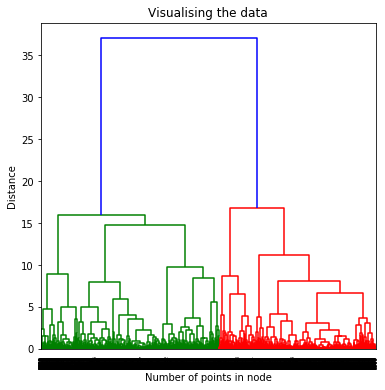

In [63]:
plt.figure(figsize =(6, 6)) #Assign the plot area to plot the pic
plt.title('Visualising the data') #Title for the plot 
plt.xlabel("Number of points in node")#X-axis title
plt.ylabel("Distance")#Y-axis title
Dendrogram = sch.dendrogram((sch.linkage(df_normalize, method ='ward'))) #Calling library to plot using ward method 

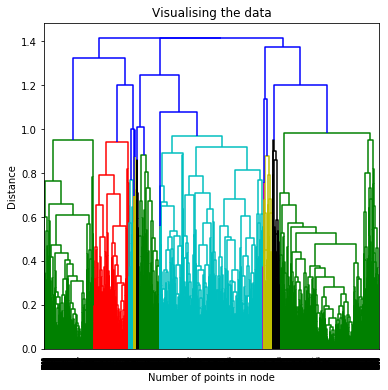

In [64]:
plt.figure(figsize =(6, 6)) #Assign the plot area to plot the pic
plt.title('Visualising the data') #Title for the plot 
plt.xlabel("Number of points in node")#X-axis title
plt.ylabel("Distance")#Y-axis title
Dendrogram = sch.dendrogram((sch.linkage(df_normalize, method ='complete')))  #Calling library to plot using complete method 

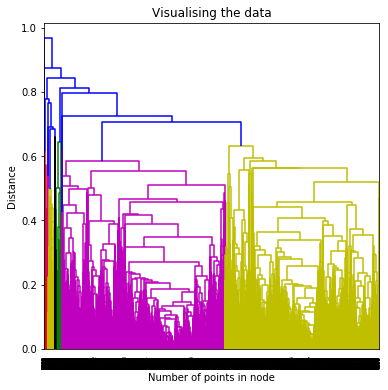

In [65]:
plt.figure(figsize =(6, 6)) #Assign the plot area to plot the pic
plt.title('Visualising the data') #Title for the plot 
plt.xlabel("Number of points in node")#X-axis title
plt.ylabel("Distance")#Y-axis title
Dendrogram = sch.dendrogram((sch.linkage(df_normalize, method ='average')))  #Calling library to plot using Average method 

With the help of dendrograms obtained above, choose a suitable **k** for each linkage type. Experiment with different distance measures as mentioned below: <br>
1. Euclidean 
2. Manhattan 
3. Cosine <br> 
Calculate the cluster quality for each case and report your results in an organized, tabular format. The table should have the parameters used, cluster means and cluster quality. 

Linkage = Average and Affinity = Cityblock
For cluster  2  : Silhouette Score is : 0.322
For cluster  3  : Silhouette Score is : 0.180
For cluster  4  : Silhouette Score is : 0.157
For cluster  5  : Silhouette Score is : 0.141
For cluster  6  : Silhouette Score is : 0.149
For cluster  7  : Silhouette Score is : 0.288


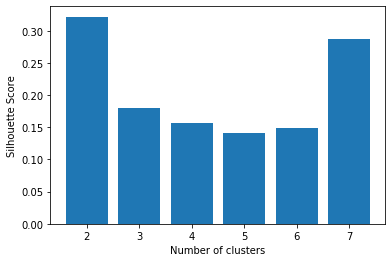

In [41]:
#With the above dendogram, K=2 comes out as good K value to experiment. 
#Using Silhouette score as well to validate the choice i.e. K=2

from sklearn.metrics import silhouette_score #Import the library to calculate cluster quality 
silhouette_scores = [] #List to obtain silhouette score for various K values
print ("Linkage = Average and Affinity = Cityblock") #Print the Linkage & Affinity type
for n_cluster in range(2, 8):
    #Get the Agglomerative clustering and pass it as second input to Silhoutte function
    score = silhouette_score(df_normalize, AgglomerativeClustering(n_clusters = n_cluster,linkage="average", affinity="cityblock").fit_predict(df_normalize))
    silhouette_scores.append(score) #Append the score 
    print ("For cluster ",n_cluster," : Silhouette Score is : {:0.3f}".format(score)) #Print the Score and cluster count given 
    
    
# Plotting a bar graph to compare the results for various K values 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [42]:
from sklearn.neighbors import NearestCentroid #import library to calculate nearest Centroid or Mean
y=AgglomerativeClustering(n_clusters = 2,linkage="average", affinity="cityblock").fit_predict(df_normalize) #Getting the clustering for K=2
clf = NearestCentroid() #Initialzing Nearest Centroid function
clf.fit(df_normalize, y) #Calculate centroids 
print(clf.centroids_) #We will get 17 Centroids for 17 features as we dropped Cust_ID feature from given dataset


[[0.05047774 0.55055618 0.01070062 0.00771334 0.00935694 0.01390726
  0.27128377 0.11130371 0.19517606 0.06138275 0.01740152 0.0211123
  0.09231093 0.02011944 0.00701671 0.08586862 0.58425919]
 [0.16529907 0.49386008 0.05115388 0.06096643 0.00104429 0.21719876
  0.11963553 0.09339091 0.03936698 0.22101697 0.13722023 0.01846365
  0.25338292 0.35699312 0.02023626 0.26591655 0.32984332]]


Linkage = Average and Affinity = Euclidean
For cluster  2  : Silhouette Score is : 0.367
For cluster  3  : Silhouette Score is : 0.298
For cluster  4  : Silhouette Score is : 0.264
For cluster  5  : Silhouette Score is : 0.233
For cluster  6  : Silhouette Score is : 0.190
For cluster  7  : Silhouette Score is : 0.155


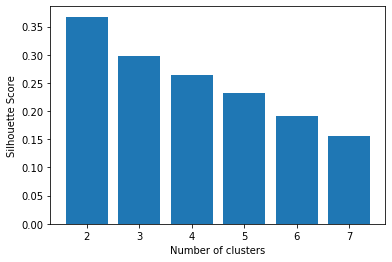

In [43]:
#With the above dendogram, K=2 comes out as good K value to experiment. 
#Using Silhouette score as well to validate the choice i.e. K=2

from sklearn.metrics import silhouette_score #Import the library to calculate cluster quality 
silhouette_scores = [] #List to obtain silhouette score for various K values
print ("Linkage = Average and Affinity = Euclidean") #Print the Linkage & Affinity type
#Get the Agglomerative clustering and pass it as second input to Silhoutte function
for n_cluster in range(2, 8):
    score = silhouette_score(df_normalize, AgglomerativeClustering(n_clusters = n_cluster,linkage="average", affinity="euclidean").fit_predict(df_normalize)) 
    silhouette_scores.append(score) #Append the score
    print ("For cluster ",n_cluster," : Silhouette Score is : {:0.3f}".format(score))
        
    
# Plotting a bar graph to compare the results for various K values 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [44]:
from sklearn.neighbors import NearestCentroid
y=AgglomerativeClustering(n_clusters = 2,linkage="average", affinity="euclidean").fit_predict(df_normalize)
clf = NearestCentroid()
clf.fit(df_normalize, y)
print(clf.centroids_) #We will get 17 Centroids for 17 features as we dropped Cust_ID feature from given dataset

[[0.05054753 0.55058602 0.01072442 0.00774396 0.00935334 0.01402141
  0.27122935 0.11130614 0.19511081 0.06142952 0.0174662  0.02111318
  0.09236027 0.02030849 0.00702406 0.08597881 0.58409608]
 [0.         0.         0.         0.         0.         0.00882712
  0.         0.         0.         0.441042   0.03764996 0.
  0.45613655 0.01260156 0.00737994 0.         0.77182427]]


Linkage = Average and Affinity = Cosine
For cluster  2  : Silhouette Score is : 0.415
For cluster  3  : Silhouette Score is : 0.274
For cluster  4  : Silhouette Score is : 0.231
For cluster  5  : Silhouette Score is : 0.228
For cluster  6  : Silhouette Score is : 0.204
For cluster  7  : Silhouette Score is : 0.167


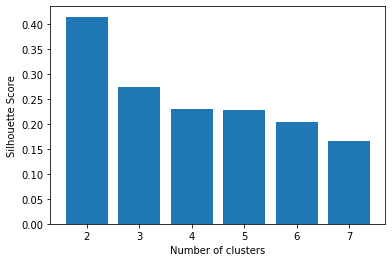

In [45]:
#With the above dendogram, K=2 comes out as good K value to experiment. 
#Using Silhouette score as well to validate the choice i.e. K=2
from sklearn.metrics import silhouette_score
silhouette_scores = [] #List to obtain silhouette score for various K values
print ("Linkage = Average and Affinity = Cosine")
#Get the Agglomerative clustering and pass it as second input to Silhoutte function
for n_cluster in range(2, 8):
    score = silhouette_score(df_normalize, AgglomerativeClustering(n_clusters = n_cluster,linkage="average", affinity="cosine").fit_predict(df_normalize))
    silhouette_scores.append(score) 
    print ("For cluster ",n_cluster," : Silhouette Score is : {:0.3f}".format(score))
   
    
# Plotting a bar graph to compare the results for various K values  
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [46]:
from sklearn.neighbors import NearestCentroid
y=AgglomerativeClustering(n_clusters = 2,linkage="average", affinity="cosine").fit_predict(df_normalize)
clf = NearestCentroid()
clf.fit(df_normalize, y)
print(clf.centroids_) #We will get 17 Centroids for 17 features as we dropped Cust_ID feature from given dataset

[[5.06023762e-02 5.50492932e-01 1.07362103e-02 7.75178951e-03
  9.36484915e-03 1.40136804e-02 2.71525747e-01 1.11405718e-01
  1.95350936e-01 6.13492257e-02 1.74530289e-02 2.11384856e-02
  9.24674567e-02 2.02926649e-02 7.03249987e-03 8.51015292e-02
  5.84806776e-01]
 [5.48611746e-03 5.74038920e-01 1.05025160e-03 1.26355023e-03
  0.00000000e+00 1.93486571e-02 2.78609886e-02 2.78609886e-02
  0.00000000e+00 1.52866887e-01 2.89583661e-02 5.08017104e-04
  4.28404678e-02 3.14563665e-02 7.64196062e-04 7.32242444e-01
  7.03911508e-02]]


##  CLustering Visualization
To visualize the clusters, reduce the data to 2 dimensions using PCA. Make a scatterplot with different colours for each cluster obtained. Make one visualization each for approach 1 and 2 (the parameters which gave the best cluster quality for each). 

In [49]:
#Doing PCA with reduced dimensions
from sklearn.decomposition import PCA #import PCA library from scikit learn 
pca = PCA(n_components = 2) #Performing PCA with 2 components for better visualization 
X_principal = pca.fit_transform(df_normalize) #Use above normalized data set
X_principal = pd.DataFrame(X_principal) #Get the PCA data frame for further usage 
X_principal.columns = ['P1', 'P2']  #Assign cols as P1 & P2 
X_principal.head() #Print first few rows

,P1,P2
0,-0.268715,-0.078539
1,-0.371696,-0.039311
2,0.123815,0.118528
3,-0.339978,-0.149330
4,-0.339570,0.022847


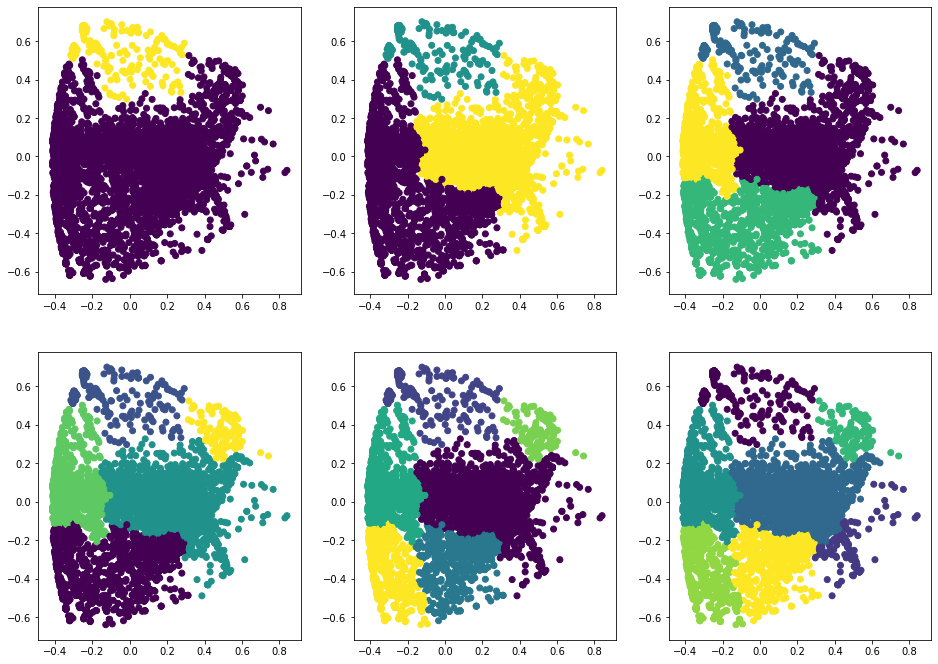

In [50]:
# Visualizing the clustering 
plt.figure(figsize=[16,18])
k=1
for n_cluster in range(2, 8):#Plotting for different K values to see the clustering 
    plt.subplot(3,3,k)
    plt.scatter(X_principal['P1'], X_principal['P2'],                
           c = AgglomerativeClustering(n_clusters = n_cluster,linkage="average", affinity="euclidean").fit_predict(X_principal)) 
    k=k+1 #increment for next k value
plt.show()

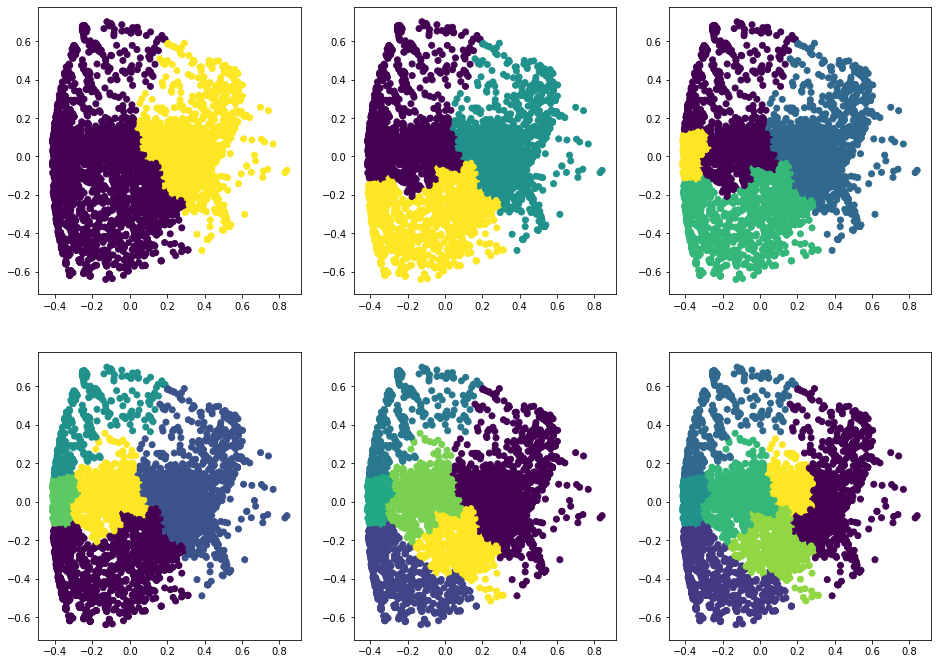

In [51]:
#Note: Ward can only work with euclidean distances.
# Visualizing the clustering 
plt.figure(figsize=[16,18])
k=1
for n_cluster in range(2, 8):#Plotting for different K values to see the clustering
    plt.subplot(3,3,k)
    plt.scatter(X_principal['P1'], X_principal['P2'],                
           c = AgglomerativeClustering(n_clusters = n_cluster,linkage="ward", affinity="euclidean").fit_predict(X_principal)) 
    k=k+1
plt.show()

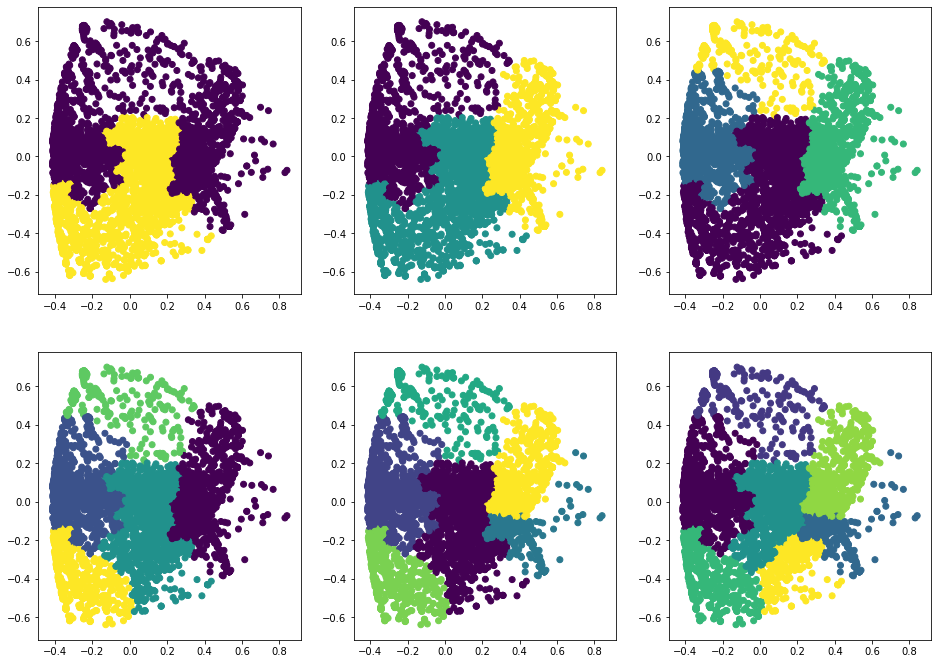

In [52]:
# Visualizing the clustering 
plt.figure(figsize=[16,18])
k=1
for n_cluster in range(2, 8):#Plotting for different K values to see the clustering
    plt.subplot(3,3,k)
    plt.scatter(X_principal['P1'], X_principal['P2'],                
           c = AgglomerativeClustering(n_clusters = n_cluster,linkage="complete", affinity="euclidean").fit_predict(X_principal)) 
    k=k+1
plt.show()

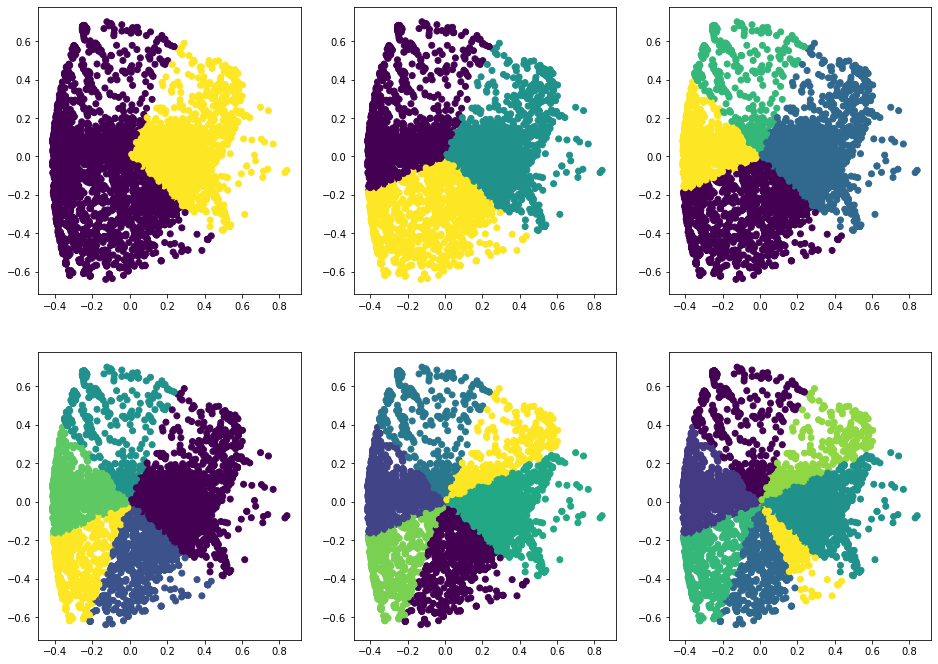

In [53]:
# Visualizing the clustering 
plt.figure(figsize=[16,18])
k=1
for n_cluster in range(2, 8):#Plotting for different K values to see the clustering
    plt.subplot(3,3,k)
    plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = n_cluster,linkage="average", affinity="cosine").fit_predict(X_principal)) 
    k=k+1
plt.show()

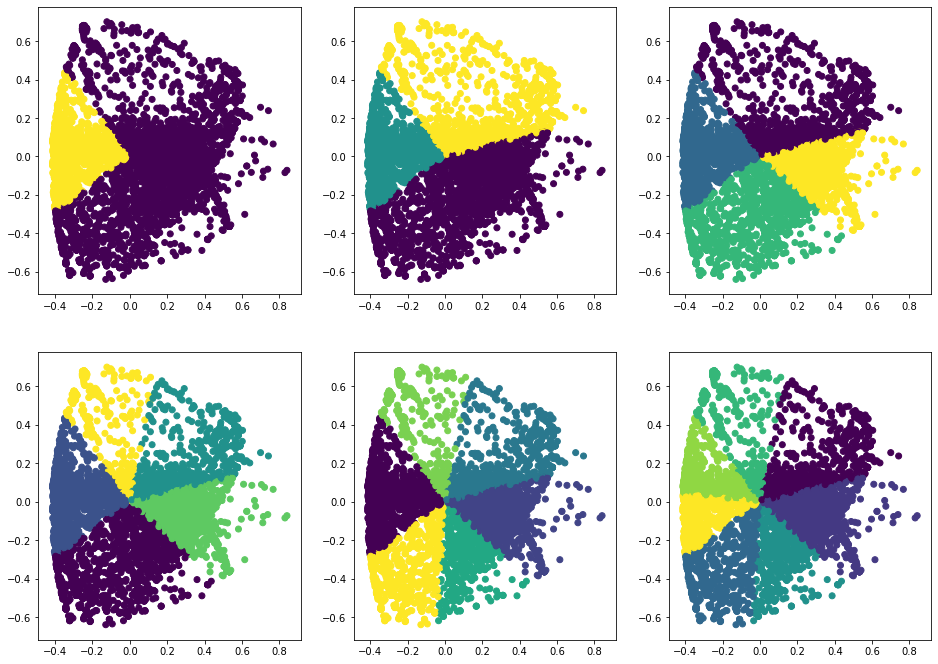

In [54]:
# Visualizing the clustering 
plt.figure(figsize=[16,18])
k=1
for n_cluster in range(2, 8):#Plotting for different K values to see the clustering
    plt.subplot(3,3,k)
    plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = n_cluster,linkage="complete", affinity="cosine").fit_predict(X_principal)) 
    k=k+1
plt.show()

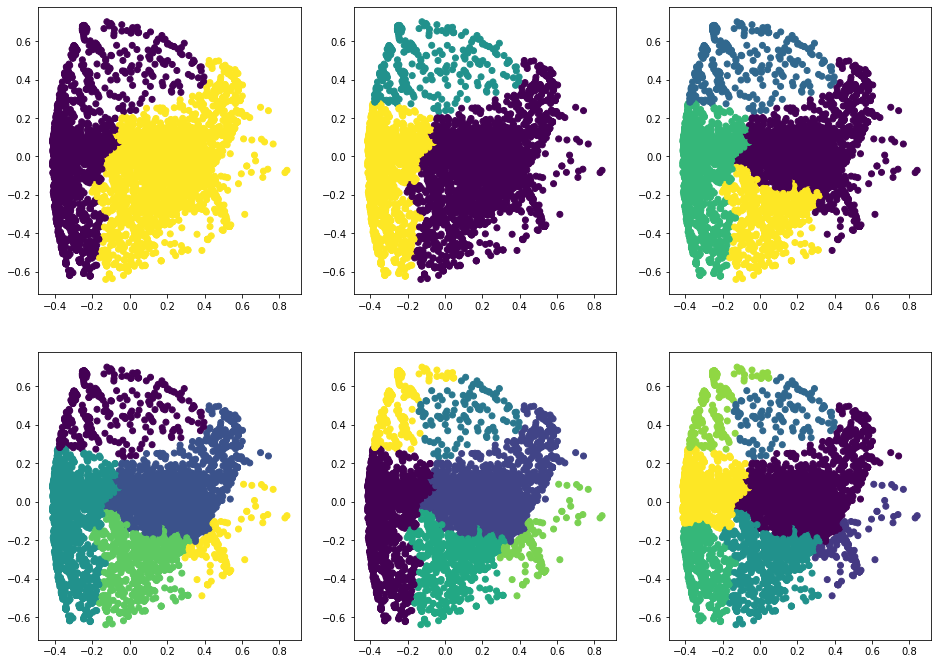

In [55]:
# Visualizing the clustering 
plt.figure(figsize=[16,18])
k=1
for n_cluster in range(2, 8):#Plotting for different K values to see the clustering
    plt.subplot(3,3,k)
    plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = n_cluster,linkage="average", affinity="cityblock").fit_predict(X_principal)) 
    k=k+1
plt.show()

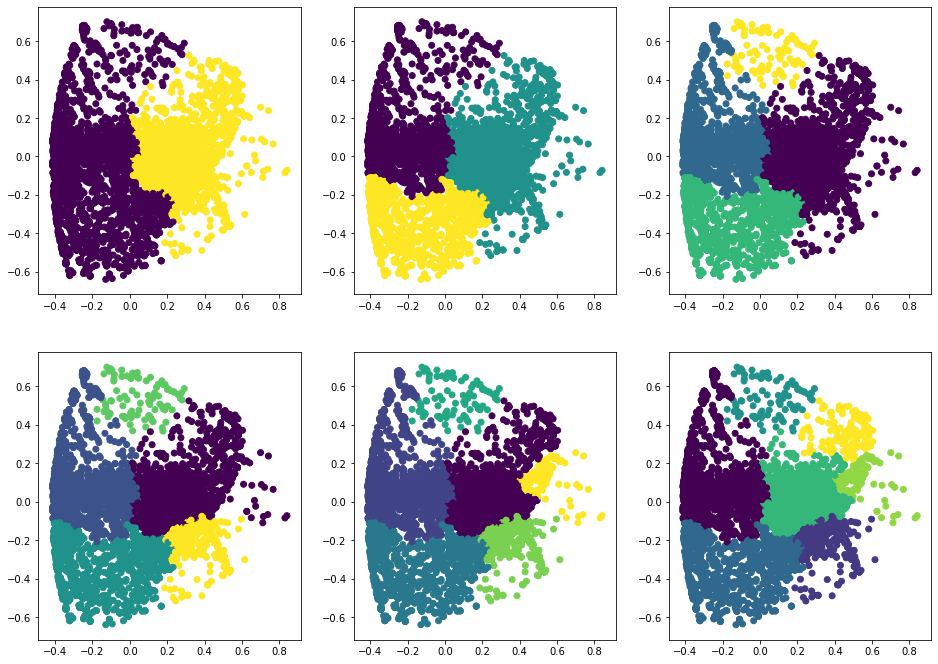

In [56]:
# Visualizing the clustering 
from scipy.cluster.hierarchy import centroid
plt.figure(figsize=[16,18])
k=1
for n_cluster in range(2, 8):#Plotting for different K values to see the clustering
    plt.subplot(3,3,k)
    plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AgglomerativeClustering(n_clusters = n_cluster,linkage="complete", affinity="cityblock").fit_predict(X_principal))
    k=k+1
plt.show()



# Calculating Silhoutte Score for PCA Normalized Data 

Linkage = Average and Affinity = Cityblock
For cluster  2  : Silhouette Score is : 0.540
For cluster  3  : Silhouette Score is : 0.543
For cluster  4  : Silhouette Score is : 0.490
For cluster  5  : Silhouette Score is : 0.441
For cluster  6  : Silhouette Score is : 0.423
For cluster  7  : Silhouette Score is : 0.459


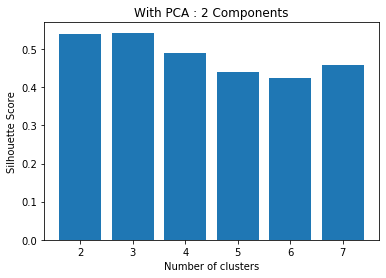

In [57]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 
print ("Linkage = Average and Affinity = Cityblock")
for n_cluster in range(2, 8):
    score = silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster,linkage="average", affinity="cityblock").fit_predict(X_principal))
    silhouette_scores.append(score)
    print ("For cluster ",n_cluster," : Silhouette Score is : {:0.3f}".format(score))
    
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title('With PCA : 2 Components')
plt.show()

Linkage = Average and Affinity = Euclidean
For cluster  2  : Silhouette Score is : 0.357
For cluster  3  : Silhouette Score is : 0.507
For cluster  4  : Silhouette Score is : 0.544
For cluster  5  : Silhouette Score is : 0.497
For cluster  6  : Silhouette Score is : 0.481
For cluster  7  : Silhouette Score is : 0.456


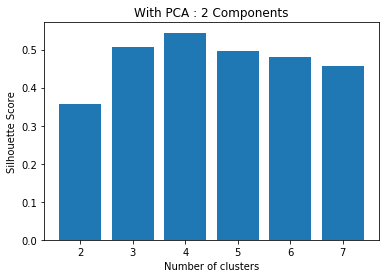

In [58]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 
print ("Linkage = Average and Affinity = Euclidean")
for n_cluster in range(2, 8):
    score = silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster,linkage="average", affinity="euclidean").fit_predict(X_principal)) 
    silhouette_scores.append(score)
    print ("For cluster ",n_cluster," : Silhouette Score is : {:0.3f}".format(score))
        
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title('With PCA : 2 Components')
plt.show()

linkage=average and affinity=cosine
For cluster  2  : Silhouette Score is : 0.516
For cluster  3  : Silhouette Score is : 0.541
For cluster  4  : Silhouette Score is : 0.527
For cluster  5  : Silhouette Score is : 0.505
For cluster  6  : Silhouette Score is : 0.435
For cluster  7  : Silhouette Score is : 0.407


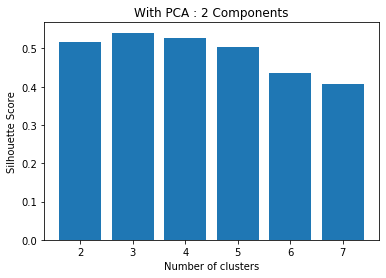

In [59]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 
print ("linkage=average and affinity=cosine")
for n_cluster in range(2, 8):
    score = silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster,linkage="average", affinity="cosine").fit_predict(X_principal))
    silhouette_scores.append(score) 
    print ("For cluster ",n_cluster," : Silhouette Score is : {:0.3f}".format(score))
   
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.title('With PCA : 2 Components')
plt.show()

# Best Clustering Hyperparameters

Agglomerative Clustering

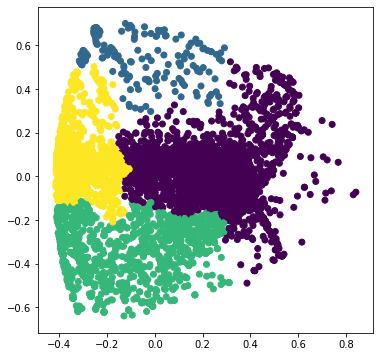

In [69]:
#Agglomerative Clustering with best results obtained above 
# Visualizing the clustering 
#With K=4, Linkage=Average , Affinity = Euclidean 
plt.figure(figsize=[6,6])
plt.scatter(X_principal['P1'], X_principal['P2'],                
           c = AgglomerativeClustering(n_clusters = 4,linkage="average", affinity="euclidean").fit_predict(X_principal)) 
plt.show()

In [61]:
#Calculating the Centroid with PCA on dataset 
from sklearn.neighbors import NearestCentroid
y=AgglomerativeClustering(n_clusters = 2,linkage="average", affinity="cityblock").fit_predict(X_principal)
clf = NearestCentroid()
clf.fit(X_principal, y)
print(clf.centroids_) #For two cols P1 & P2, we will get two Centroids coordinates.

[[-0.30815709  0.02853592]
 [ 0.24059061 -0.02227914]]
